In [1]:
import os

In [6]:
import pickle
import numpy as np, matplotlib.pyplot as plt

with open("mean_landmark_hundred_seeds_results", 'rb') as f: 
 (META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

In [7]:
def all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach):
    
    # plot the ROC curve 

    average_tprs = np.mean(np.array(AVERAGE_TPRS), axis = 0)
    meta_avg_tpr = np.mean(average_tprs, axis = 0) 
    base_fpr = np.linspace(0, 1, 101) 
    
    plt.plot(base_fpr, average_tprs, label = "average of runs")

    std_tpr = np.std(AVERAGE_TPRS, axis=0)
    tprs_upper = np.minimum(np.mean(AVERAGE_TPRS,axis=0) + std_tpr, 1)
    tprs_lower = np.maximum(np.mean(AVERAGE_TPRS,axis=0) - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3, label=r'$\pm$ 1 std. dev.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = "chance")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{approach} Average ROC Curve')
    plt.legend(loc="lower right")

    plt.savefig(f"seed_plots/{approach} ROC Curve")

    plt.show()


    # receive evaluation for basically everything
    METRICS = []
    for fold_results in np.array_split(META_RESULT_MATRIX, 100):
        """cluster based on cross validtion run"""
        METRICS.append(np.mean(fold_results, axis = 0)) 

    METRICS = np.around(np.array(METRICS), 3)
    print(f"training accuracy : {np.mean(METRICS[:, 0])} +/- {np.std(METRICS[:, 0])}")
    print(f"training precision : {np.mean(METRICS[:, 1])} +/- {np.std(METRICS[:, 1])}")
    print(f"training recall : {np.mean(METRICS[:, 2])} +/- {np.std(METRICS[:, 2])}")
    print(f"training f1 : {np.mean(METRICS[:, 3])} +/- {np.std(METRICS[:, 3])}")
    print(f"validation accuracy : {np.mean(METRICS[:, 4])} +/- {np.std(METRICS[:, 4])}")
    print(f"validation precision : {np.mean(METRICS[:, 5])} +/- {np.std(METRICS[:, 5])}")
    print(f"validation recall : {np.mean(METRICS[:, 6])} +/- {np.std(METRICS[:, 6])}")
    print(f"validation f1 : {np.mean(METRICS[:, 7])} +/- {np.std(METRICS[:, 7])}")
    print(f"average auroc : {np.mean(AVERAGE_AUROCS)} +/- {np.std(AVERAGE_AUROCS)}")

In [8]:
np.array(META_RESULT_MATRIX).shape

(500, 8)

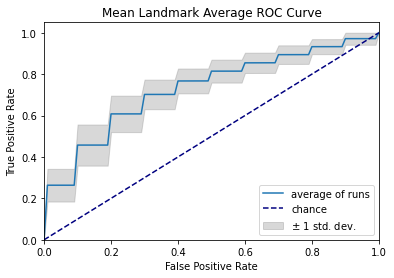

training accuracy : 0.6915800000000002 +/- 0.04108897175642145
training precision : 0.70384 +/- 0.052918563850505244
training recall : 0.7055500000000002 +/- 0.07073858565167952
training f1 : 0.68868 +/- 0.05120876487477509
validation accuracy : 0.6553000000000001 +/- 0.045397246612542484
validation precision : 0.6667099999999999 +/- 0.07396286838677905
validation recall : 0.669 +/- 0.09630680142129111
validation f1 : 0.6421899999999999 +/- 0.06772277238861385
average auroc : 0.7265499999999999 +/- 0.04365967819395833


In [9]:
all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach = "Mean Landmark")

# lets run p-value tests on all (validation) results for all metrics

In [12]:
with open("mean_landmark_hundred_seeds_results", 'rb') as f: 
 (MEAN_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)


In [13]:
with open("one_landmark_hundred_seeds_results", 'rb') as f: 
 (ONE_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

with open("all_landmarks_hundred_seeds_results", 'rb') as f: 
 (ALL_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

with open("six_landmarks_hundred_seeds_results", 'rb') as f: 
 (SIX_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

In [28]:
def boil(matrix): 
    matrix = np.array_split(matrix, 100)
    return np.array([np.mean(fold_results, axis = 0) for fold_results in matrix])

In [30]:
MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX = [np.array(mat) for mat in [MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX]]
MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX = list(map(boil, [MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX]))

In [31]:
MEAN_META_RESULT_MATRIX.shape

(100, 8)

In [32]:
approaches = ['mean', 'one', 'all', 'six']
metrics = list(map(lambda x : "validation " + x, ["accuracy", "precision", "recall", "F1"]))
approach_matrix = {approach : matrix for approach, matrix in zip(approaches, [MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX])}

In [33]:
metrics

['validation accuracy',
 'validation precision',
 'validation recall',
 'validation F1']

In [34]:
from scipy.stats import ttest_ind
for i in range(4): 
    for j in range(i + 1, 4): 
        print(f"{approaches[i]} vs {approaches[j]}")
        for k in range(4):
            print(f"for {metrics[k]} : {ttest_ind(approach_matrix[approaches[i]][:, 4 + k], approach_matrix[approaches[j]][:, 4 + k]).pvalue}")
        print("\n")

mean vs one
for validation accuracy : 0.6677298768921249
for validation precision : 0.8498462215261376
for validation recall : 0.41682879441214116
for validation F1 : 0.4992904697063305


mean vs all
for validation accuracy : 5.538265534222322e-06
for validation precision : 1.650578472857774e-05
for validation recall : 0.15397328926548498
for validation F1 : 0.0015635287494645547


mean vs six
for validation accuracy : 1.3820978126569102e-12
for validation precision : 4.414133943807913e-09
for validation recall : 0.5911320307512684
for validation F1 : 3.4204992548060963e-07


one vs all
for validation accuracy : 2.3364389601819195e-05
for validation precision : 7.797161703050459e-06
for validation recall : 0.009891807294584729
for validation F1 : 0.014722388841188812


one vs six
for validation accuracy : 4.998551068561382e-12
for validation precision : 1.970241660876049e-09
for validation recall : 0.6565656358715914
for validation F1 : 6.938870923445502e-06


all vs six
for validation